## COMP 4447: Wk9 Live

In [64]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

In [4]:
# standardization (z-normalization)

from sklearn.preprocessing import StandardScaler

df = DataFrame({'feat': np.random.rand(100)*100})

ss = StandardScaler()

df['feat_z'] = ss.fit_transform(df[['feat']])

print(df['feat_z'].mean())
print(df['feat_z'].std())

-1.9317880628477724e-16
1.005037815259212


In [8]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

df['feat_r_scale'] = rs.fit_transform(df[['feat']])

print(df['feat_r_scale'].mean())
print(df['feat_r_scale'].std())

-0.013356530989515374
0.6393485566074506


In [9]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

df['feat_norm'] = mm.fit_transform(df[['feat']])

print(df['feat_norm'].max())
print(df['feat_norm'].min())

# Note that sklearn Normalizer() operates row-wise and scales samples to unit norm.  We're concerned with normalizing columns
# at the moment and should use MinMaxScaler()

1.0
0.0


Text(0.5, 1.0, 'min-max')

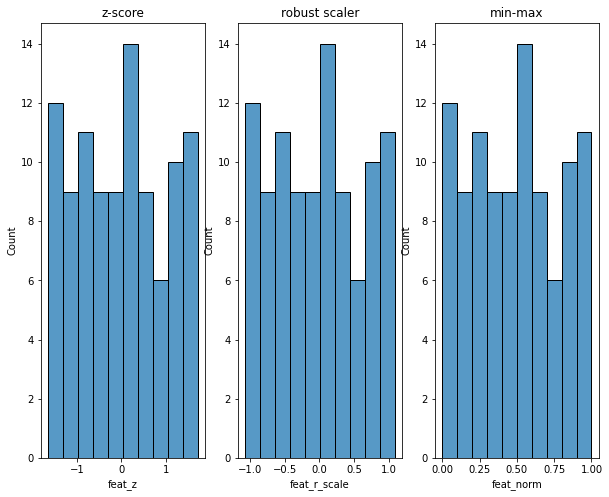

In [19]:
# note that these transformations aren't really changing the shapes of our distributions

fig, axes = plt.subplots(1, 3, figsize=(10, 8))

sns.histplot(data=df, x='feat_z', bins='sqrt', ax=axes[0])
axes[0].set_title('z-score')

sns.histplot(data=df, x='feat_r_scale', bins='sqrt', ax=axes[1])
axes[1].set_title('robust scaler')

sns.histplot(data=df, x='feat_norm', bins='sqrt', ax=axes[2])
axes[2].set_title('min-max')

(-2.0, 2.0)

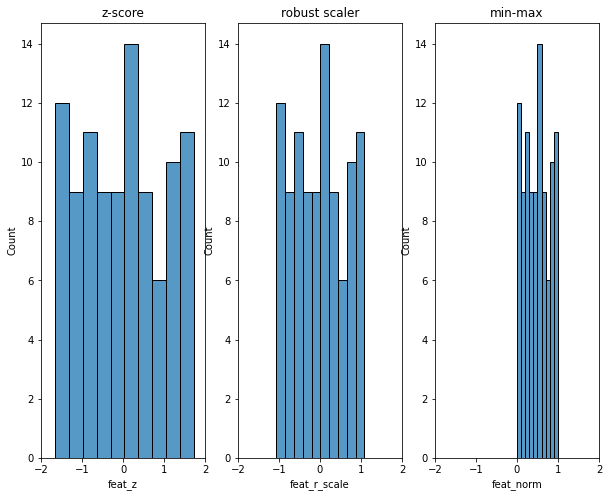

In [17]:
# There is an impact on the range of the transformed features.

fig, axes = plt.subplots(1, 3, figsize=(10, 8))

sns.histplot(data=df, x='feat_z', bins='sqrt', ax=axes[0])
axes[0].set_title('z-score')
axes[0].set_xlim([-2, 2])

sns.histplot(data=df, x='feat_r_scale', bins='sqrt', ax=axes[1])
axes[1].set_title('robust scaler')
axes[1].set_xlim([-2, 2])

sns.histplot(data=df, x='feat_norm', bins='sqrt', ax=axes[2])
axes[2].set_title('min-max')
axes[2].set_xlim([-2, 2])

### strptime vs strftime

In [66]:
# first of all, as you've probably noticed, pd.datetime is deprecated.
# just use datetime from the datetime module...which is what pandas used anyway.

# strptime(): Parse string. Convert string to dattime object

str_date = '11/15/2022 01:01:01'
dt = datetime.strptime(str_date, '%m/%d/%Y %H:%M:%S')

# strftime(): Format string. Convert datetime object to string.
datetime.strftime(dt, '%m/%d/%Y %H:%M:%S')


'11/15/2022 01:01:01'

In [70]:
# or
dt.strftime('%m/%d/%Y %H:%M:%S')

'11/15/2022 01:01:01'

## Let's curl some data

In [23]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 66136  100 66136    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k


In [24]:
!unzip Absenteeism_at_work_AAA.zip

Archive:  Absenteeism_at_work_AAA.zip
  inflating: Absenteeism_at_work.arff  
  inflating: Absenteeism_at_work.csv  
  inflating: Absenteeism_at_work.xls  
  inflating: Attribute Information.docx  
  inflating: UCI_ABS_TEXT.docx       


In [29]:
abs_df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [ ]:
#### While this is technically time series data, we don't have sufficient information to build a reliable datetime feature
#### to represent the precise point of each record.

In [32]:
abs_df[['Month of absence', 'Day of the week', 'Seasons']].head(10)

,Month of absence,Day of the week,Seasons
0,7,3,1
1,7,3,1
2,7,4,1
3,7,5,1
4,7,5,1
5,7,6,1
6,7,6,1
7,7,6,1
8,7,2,1
9,7,2,1


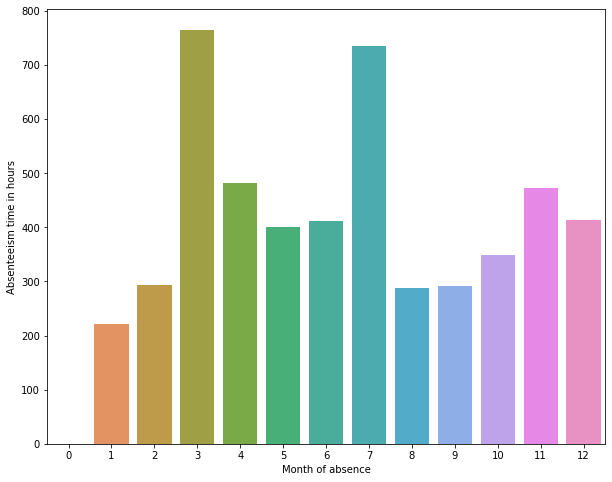

In [83]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=abs_df, 
            x='Month of absence', 
            y='Absenteeism time in hours',
            estimator=np.sum,
            ci=None,
            ax=ax)

plt.show()

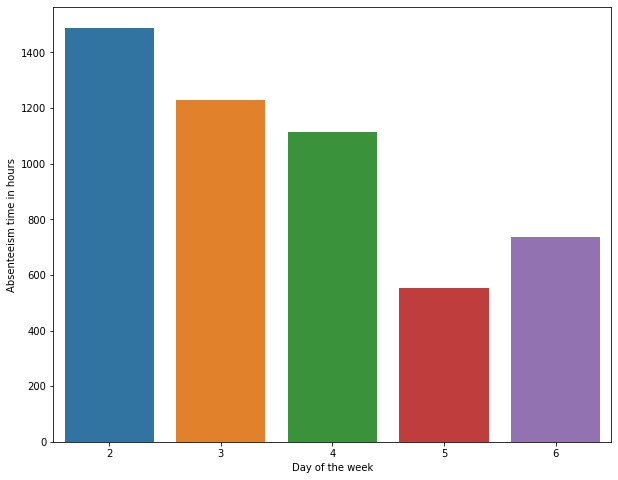

In [84]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=abs_df, 
            x='Day of the week', 
            y='Absenteeism time in hours',
            estimator=np.sum,
            ci=None,
            ax=ax)

plt.show()

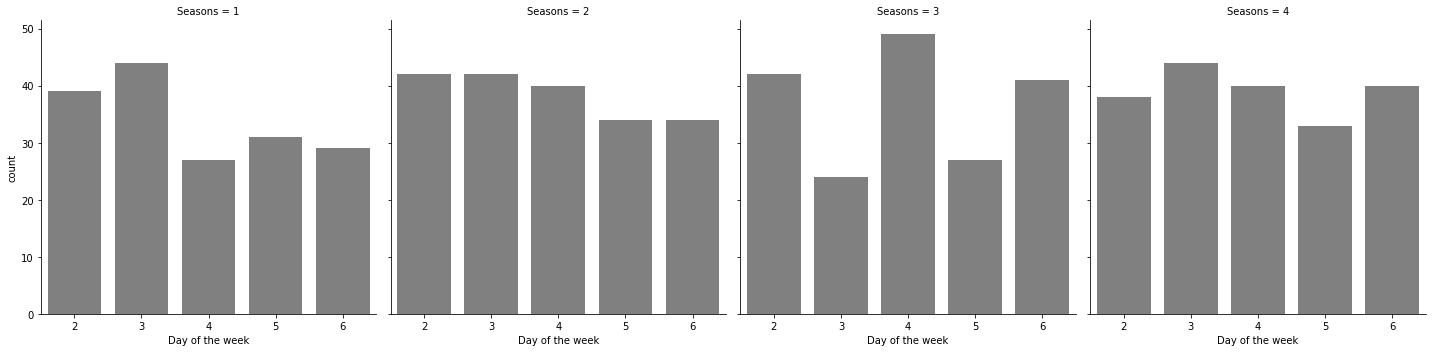

In [94]:
sns.catplot(data=abs_df, x='Day of the week', estimator='count', kind='count', color='gray', col='Seasons')

In [33]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35074  100 35074    0     0  83311      0 --:--:-- --:--:-- --:--:-- 83311


In [34]:
!unzip dow_jones_index

Archive:  dow_jones_index.zip
  inflating: dow_jones_index.data    
  inflating: dow_jones_index.names   


In [95]:
dow = pd.read_csv('dow_jones_index.data')

In [96]:
dow.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [97]:
dow = pd.read_csv('dow_jones_index.data', index_col=2,
                 parse_dates=[2],
                 infer_datetime_format=True)

In [98]:
dow.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-07,1,AA,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
2011-01-14,1,AA,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2011-01-21,1,AA,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
2011-01-28,1,AA,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
2011-02-04,1,AA,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [99]:
# these data are recorded weekly
dow.index

DatetimeIndex(['2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
               '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
               '2011-03-04', '2011-03-11',
               ...
               '2011-04-21', '2011-04-29', '2011-05-06', '2011-05-13',
               '2011-05-20', '2011-05-27', '2011-06-03', '2011-06-10',
               '2011-06-17', '2011-06-24'],
              dtype='datetime64[ns]', name='date', length=750, freq=None)

In [110]:
dow['stock'].value_counts()

AA      25
AXP     25
WMT     25
VZ      25
UTX     25
TRV     25
T       25
PG      25
PFE     25
MSFT    25
MRK     25
MMM     25
MCD     25
KO      25
KRFT    25
JPM     25
JNJ     25
INTC    25
IBM     25
HPQ     25
HD      25
GE      25
DIS     25
DD      25
CVX     25
CSCO    25
CAT     25
BAC     25
BA      25
XOM     25
Name: stock, dtype: int64

In [111]:
# we need multi-indexed rows here

dow = pd.read_csv('dow_jones_index.data', index_col=[1, 2],
                 parse_dates=[2],
                 infer_datetime_format=True)

In [116]:
dow.index.names

FrozenList(['stock', 'date'])

In [140]:
# Upsampling
# Say we want to resample to get data points for each day

dow = pd.read_csv('dow_jones_index.data', index_col=[2],
                 parse_dates=[2],
                 infer_datetime_format=True)

dow_daily = dow.groupby('stock').resample('1D').ffill()

In [143]:
dow_daily.index

MultiIndex([( 'AA', '2011-01-07'),
            ( 'AA', '2011-01-08'),
            ( 'AA', '2011-01-09'),
            ( 'AA', '2011-01-10'),
            ( 'AA', '2011-01-11'),
            ( 'AA', '2011-01-12'),
            ( 'AA', '2011-01-13'),
            ( 'AA', '2011-01-14'),
            ( 'AA', '2011-01-15'),
            ( 'AA', '2011-01-16'),
            ...
            ('XOM', '2011-06-15'),
            ('XOM', '2011-06-16'),
            ('XOM', '2011-06-17'),
            ('XOM', '2011-06-18'),
            ('XOM', '2011-06-19'),
            ('XOM', '2011-06-20'),
            ('XOM', '2011-06-21'),
            ('XOM', '2011-06-22'),
            ('XOM', '2011-06-23'),
            ('XOM', '2011-06-24')],
           names=['stock', 'date'], length=5070)

In [145]:
dow_daily.index.get_level_values(-1)

DatetimeIndex(['2011-01-07', '2011-01-08', '2011-01-09', '2011-01-10',
               '2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14',
               '2011-01-15', '2011-01-16',
               ...
               '2011-06-15', '2011-06-16', '2011-06-17', '2011-06-18',
               '2011-06-19', '2011-06-20', '2011-06-21', '2011-06-22',
               '2011-06-23', '2011-06-24'],
              dtype='datetime64[ns]', name='date', length=5070, freq=None)

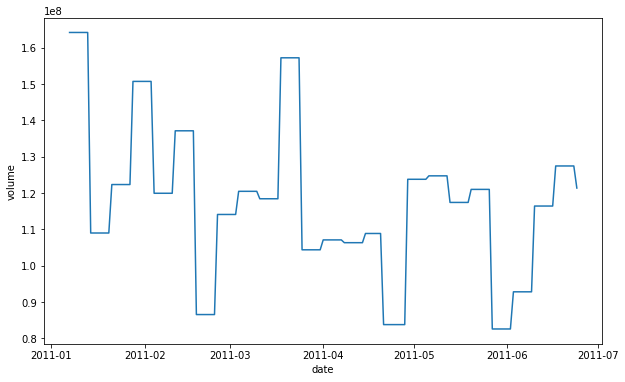

In [157]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=dow_daily, 
             x=dow_daily.index.get_level_values(-1), 
             y='volume', 
             ci=None,
             ax=ax)

plt.show()

In [162]:
# downsample

dow_monthly = dow.groupby('stock').resample('1M').mean()

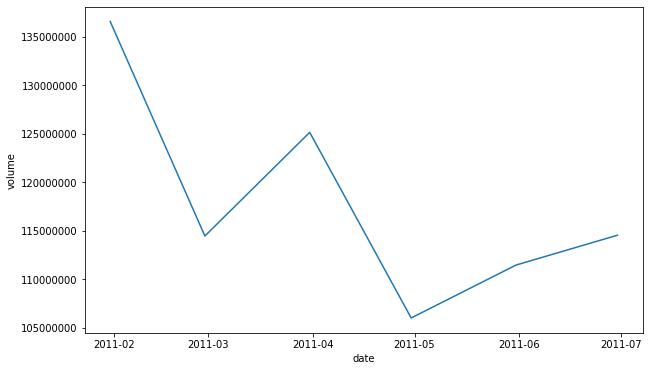

In [165]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=dow_monthly, 
             x=dow_monthly.index.get_level_values(-1), 
             y='volume', 
             ci=None,
             ax=ax)

ax.yaxis.get_major_formatter().set_scientific(False)

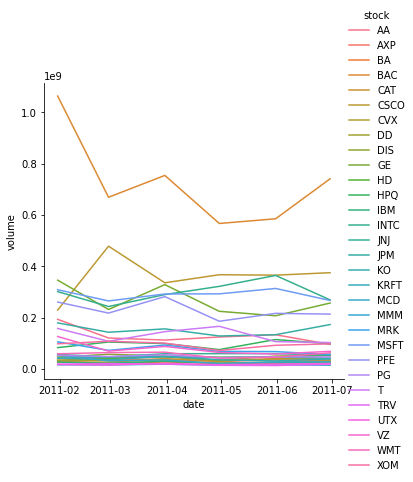

In [168]:
sns.relplot(data=dow_monthly, 
            x=dow_monthly.index.get_level_values(-1),
           y='volume',
           hue='stock',
           kind='line')